In [103]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./train.csv')
df['Country/Region'] = df['Country/Region'].astype('category')
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)
df['ConfirmedCasesCum'] = df['ConfirmedCases'].cumsum()
df['FatalitiesCum'] = df['Fatalities'].cumsum()

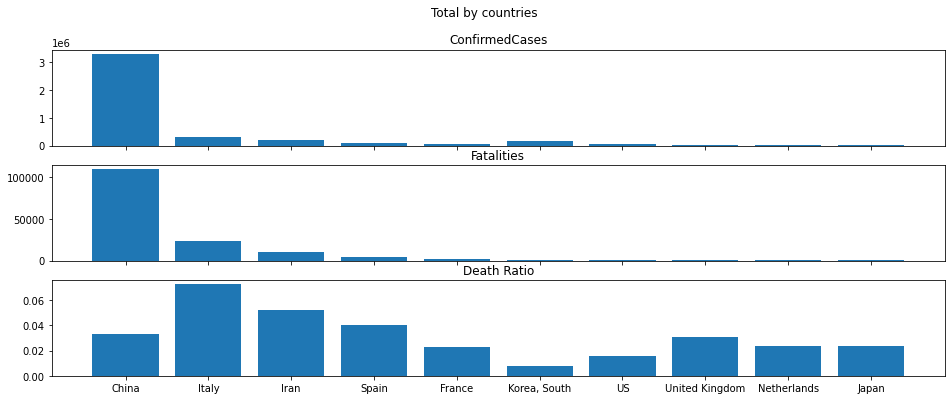

In [123]:
grouped = df.groupby('Country/Region', as_index=False)
counts = grouped[['ConfirmedCases', 'Fatalities']].sum().sort_values(by='Fatalities', ascending=False)[0:10]

f, axs = plt.subplots(3, figsize=(16, 6), sharex=True)
f.suptitle('Total by countries')
axs[0].bar(counts['Country/Region'], counts['ConfirmedCases'])
axs[0].set_title('ConfirmedCases')
axs[1].bar(counts['Country/Region'], counts['Fatalities'])
axs[1].set_title('Fatalities')
axs[2].bar(counts['Country/Region'], counts['Fatalities']/counts['ConfirmedCases'])
axs[2].set_title('Death Ratio')
plt.show()

In [116]:
countries = [{"name": 'France', "df": None}, {"name": 'Italy', "df": None}, {"name": 'China', "df":None}]

for country in countries:
    country_df = df[(df['Country/Region']==country['name'])].copy()
    country_df['ConfirmedCasesCum'] = country_df['ConfirmedCases'].cumsum()
    country_df['FatalitiesCum'] = country_df['Fatalities'].cumsum()
    country_df = country_df[country_df['FatalitiesCum']>0].copy()
    country['df'] = country_df

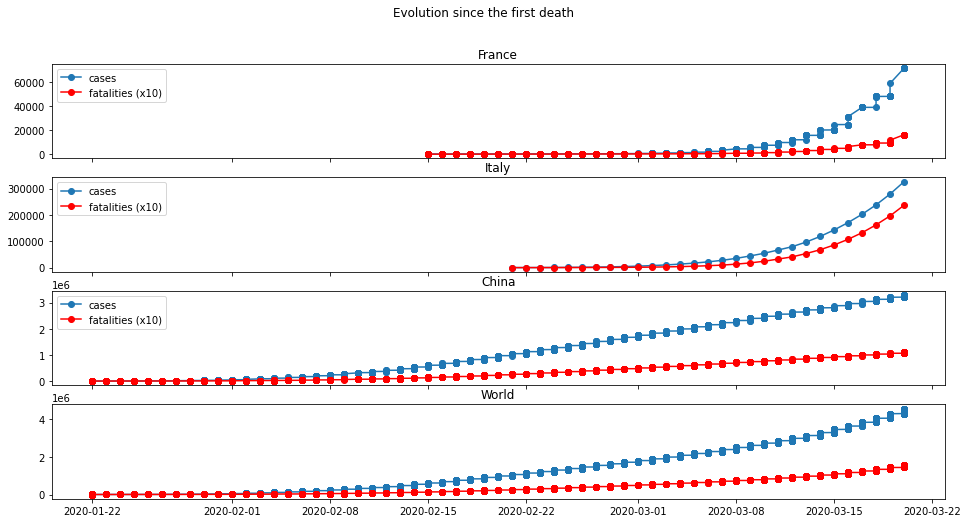

In [122]:
fig, axs = plt.subplots(len(countries)+1, figsize=(16, 8), sharex=True)
fig.suptitle('Evolution since the first death')

for (idx, country) in enumerate(countries):
    axs[idx].plot_date(country['df']['Date'], country['df']['ConfirmedCasesCum'], linestyle='-')
    axs[idx].plot_date(country['df']['Date'], country['df']['FatalitiesCum']*10, linestyle='-', c='red')
    axs[idx].set_title(country['name'])
    axs[idx].legend(['cases', 'fatalities (x10)'])

axs[-1].plot_date(df['Date'], df['ConfirmedCasesCum'], linestyle='-')
axs[-1].plot_date(df['Date'], df['FatalitiesCum']*10, linestyle='-', c='red')
axs[-1].set_title('World')
plt.show()